### logistic regression
The logistic regression formula is derived from the standard linear equation for a straight line. As you may recall from grade school, that is $y=mx + b$ . Using the Sigmoid function (shown below), the standard linear formula is transformed to the logistic regression formula (also shown below). This logistic regression function is useful for predicting the class of a binomial target feature

##### Importing the Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics


##### Importing the dataset

In [41]:
df = pd.read_csv('day_006_Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [42]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [43]:
import seaborn as sns
%matplotlib inline

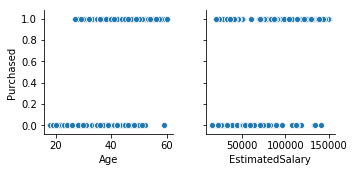

In [45]:
sns.pairplot(df, x_vars=['Age','EstimatedSalary'],y_vars='Purchased')

##### Splitting the dataset into the Training set and Test set
We will split the dataset into a training dataset and test dataset. We will use 75% of our data to train and the rest 20% to test. To do this, we will create a split variable which will divide the data frame in a 75-25 ratio. ‘X_train’ and ‘y_train’ are the train dataset. ‘X_test’ and ‘y_test’ are the test dataset.

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


##### Fitting Logistic Regression to the Training set
We will instantiate the logistic regression in Python using ‘LogisticRegression’ function and fit the model on the training dataset using ‘fit’ function.

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Predicting the Test set results
we will predict the class labels using predict function for the test dataset.

In [ ]:
y_pred = classifier.predict(X_test)

If you print ‘y_pred’ variable, you will observe that the classifier is predicting 1, when the probability in the second column of variable ‘probability’ is greater than 0.5. When the probability in the second column is less than 0.5, then the classifier is predicting -1.

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [49]:
#cm = metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

[[65  3]
 [ 8 24]]


In [33]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92        68
          1       0.89      0.75      0.81        32

avg / total       0.89      0.89      0.89       100



In [35]:
print(classifier.score(X_test,y_test))

0.89
